<a href="https://colab.research.google.com/github/Vatsala-18/MachineLearning/blob/main/10_NLP(Part1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP(Natural Language Processing)**

In [1]:
#Tokenization(breakdown the large texts into small tokens(paragraphs or sentenses into words))
#Data Cleaning and preprocessing
#Feed the vector data to model
#Classifier type of problem

In [2]:
s = ['Congrats, YOu have won lottery and you get lottery money by calling lottery number',
     'Give your bank details for lottery',
     'lottery for sure if bank details are verified']

In [3]:
type(s)

list

In [4]:
#tokenization
s[0].split()

['Congrats,',
 'YOu',
 'have',
 'won',
 'lottery',
 'and',
 'you',
 'get',
 'lottery',
 'money',
 'by',
 'calling',
 'lottery',
 'number']

In [6]:
s[1].split()

['Give', 'your', 'bank', 'details', 'for', 'lottery']

In [7]:
s[2].split()

['lottery', 'for', 'sure', 'if', 'bank', 'details', 'are', 'verified']

In [8]:
#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vect = CountVectorizer(stop_words='english')
op = vect.fit_transform(s).toarray()
op
#array is the raw document

array([[0, 1, 1, 0, 3, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 0]])

In [13]:
import pandas as pd
df = pd.DataFrame(op,columns=vect.get_feature_names())  #print feature name selected (terms selected) from the raw document
df  #shows how many times each unique value is repeated

,bank,calling,congrats,details,lottery,money,number,sure,verified,won
0,0,1,1,0,3,1,1,0,0,1
1,1,0,0,1,1,0,0,0,0,0
2,1,0,0,1,1,0,0,1,1,0


In [14]:
#SPAM AND HAM TEXT MESSAGES
df = pd.read_csv('https://raw.githubusercontent.com/diazonic/Machine-Learning-using-sklearn/master/Datasets/spam.tsv',sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [16]:
df[100:105]

,label,message,length,punct
100,ham,Please don't text me anymore. I have nothing e...,57,3
101,ham,Okay name ur price as long as its legal! Wen c...,81,2
102,ham,I'm still looking for a car to buy. And have n...,76,3
103,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
104,ham,wow. You're right! I didn't mean to do that. I...,183,8


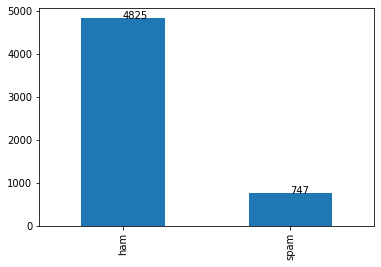

In [17]:
import matplotlib.pyplot as plt 
#highly imbalanced dataset 
#metrics should not be considered only using accuracy (precision, recall)
df['label'].value_counts().plot(kind = 'bar')
a = df['label'].value_counts()
plt.text(0,a[0],a[0])
plt.text(1,a[1],a[1])
plt.show()

In [18]:
df['message'][5567]

'This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [19]:
x = df['message'].values     # input 
y = df['label'].values       # output

In [20]:
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [21]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [22]:
#split the data 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [23]:
print(x_train.shape)
print(x_test.shape)

(4179,)
(1393,)


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
#applying count vectorizer for input data 
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [26]:
from sklearn.svm import SVC   #we use the support vector machine # (classifier)
model = SVC()
model.fit(x_train_vect,y_train) #fit the model / map the input with output 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y_pred = model.predict(x_test_vect)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [29]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [30]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)

0.9813352476669059

In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1234
        spam       0.86      1.00      0.92       159

    accuracy                           0.98      1393
   macro avg       0.93      0.99      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [32]:
test = df['message'][2003]  #actual values 
test

'TheMob>Yo yo yo-Here comes a new selection of hot downloads for our members to get for FREE! Just click & open the next link sent to ur fone...'

In [33]:
df['label'][2003]   #actual output 

'spam'

In [34]:
test = vect.transform([df['message'][2003]])   #the results of the model 
model.predict(test)

array(['spam'], dtype=object)

In [35]:
#method 2   pipeline (combines two or more estimators)

#PIPELINE = CountVectorizer+SVM

#in pipeline we take countvectorizers' fit method and svc' fit method method and both are combined  

In [36]:
from sklearn.pipeline import make_pipeline 
text_model = make_pipeline(CountVectorizer(),SVC())

text_model.fit(x_train,y_train)

y_pred = text_model.predict(x_test)
y_pred
#final pipeline estimator requires only it to be implemented 

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [37]:
text_model.predict([df['message'][0]])

array(['ham'], dtype=object)

In [38]:
text_model  #gives details about the pipeline 

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
        

In [39]:
#joblib 
import joblib

In [40]:
joblib.dump(text_model,'spam-ham') #saving the pipeline in a file

['spam-ham']